# How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.stattools import coint

In [5]:
from statsmodels.api import OLS

In [6]:
from scipy.stats import pearsonr

In [7]:
df1=pd.read_excel('KO.xls')

In [8]:
df2=pd.read_excel('PEP.xls')

In [9]:
df=pd.merge(df1, df2, on='Date', suffixes=('_KO', '_PEP'))

In [10]:
df.set_index('Date', inplace=True)

In [11]:
df.sort_index(inplace=True)

In [12]:
df

,Open_KO,High_KO,Low_KO,Close_KO,Volume_KO,Adj Close_KO,Open_PEP,High_PEP,Low_PEP,Close_PEP,Volume_PEP,Adj Close_PEP
Date,,,,,,,,,,,,
1977-01-03,79.00,79.00,78.12,78.50,1305600,0.68,79.00,80.13,79.00,80.00,1085400,0.66
1977-01-04,78.37,78.37,77.00,77.62,1440000,0.67,80.00,80.25,78.88,79.00,3018600,0.65
1977-01-05,77.62,77.75,76.37,76.37,2001600,0.66,78.75,78.75,77.88,78.38,2246400,0.65
1977-01-06,76.37,77.50,76.37,77.50,1555200,0.67,78.63,79.00,78.63,78.75,1004400,0.65
1977-01-07,77.50,77.50,76.50,77.00,1694400,0.67,78.75,78.75,78.25,78.50,950400,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-14,63.75,64.52,63.75,64.30,11465700,64.30,78.25,78.39,76.65,76.92,7762500,76.92
2008-01-15,63.63,64.20,63.56,63.61,11499700,63.61,76.02,76.55,74.71,74.83,9342100,74.83
2008-01-16,63.28,63.85,62.48,62.65,12667000,62.65,74.35,74.85,73.28,73.54,9636900,73.54


## Run cointegration (Engle-Granger) test

In [13]:
coint_t, pvalue, crit_value=coint(df['Adj Close_KO'], df['Adj Close_PEP'])

In [14]:
# abs(t-stat) < critical value at 90%.
# pvalue says probability of null hypothesis (of no cointegration) is 73%
(coint_t, pvalue, crit_value)

(-1.5815517041517138,
 0.7286134576473544,
 array([-3.89783854, -3.33691006, -3.04499143]))

## Determine hedge ratio

In [15]:
model=OLS(df['Adj Close_KO'], df['Adj Close_PEP'])

In [16]:
results=model.fit()

In [17]:
hedgeRatio=results.params

In [18]:
hedgeRatio

Adj Close_PEP    1.011409
dtype: float64

##  spread = KO - hedgeRatio*PEP

In [19]:
spread=df['Adj Close_KO']-hedgeRatio[0]*df['Adj Close_PEP']

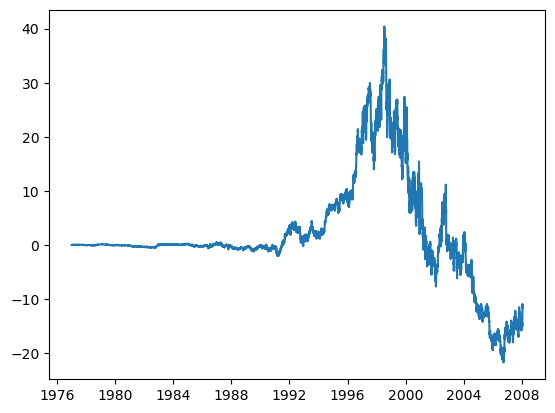

In [20]:
plt.plot(spread) # Figure 7.2

## Correlation test

In [21]:
dailyret=df.loc[:, ('Adj Close_KO', 'Adj Close_PEP')].pct_change()

In [22]:
dailyret.corr()

,Adj Close_KO,Adj Close_PEP
Adj Close_KO,1.000000,0.484924
Adj Close_PEP,0.484924,1.000000


In [23]:
dailyret_clean=dailyret.dropna()

In [24]:
# first output is correlation coefficient, second output is pvalue.
pearsonr(dailyret_clean.iloc[:,0], dailyret_clean.iloc[:,1])

PearsonRResult(statistic=0.48492394393705235, pvalue=0.0)